In [33]:
import pandas as pd
import numpy as np

def get_gene_counts(files):
    counter = 0
    
    base = pd.read_csv('../clean/' + files[0], sep = '\t', usecols = ['gene_id'])
    
    #Initialize num. of files with expression in each gene to zero
    base['counts'] = 0
    
    for file in files:
        
        #make sure gene ids match up
        cur_df = pd.read_csv('../clean/' + file, sep = '\t', usecols = ['gene_id', 'unstranded'])
        assert(list(cur_df.gene_id) == list(base.gene_id))
        
        #find where expression exists > 0
        cur_df['counts'] = (cur_df['unstranded'] > 0).astype(int)
        
        #Wherever expression >0, +1 to counts
        base.counts = base.counts + cur_df.counts
        
        if counter%100 == 0:
            print(str(counter/len(files) * 100) + '%', sum(base['counts'] == 0))
        counter += 1
        
    return base


In [34]:
import os
import pandas as pd
#Check if gene lists are the same across files
#if so, just do 0 vs > 0 and addition instead of iterating. much faster. 

genes = get_gene_set(os.listdir('../clean'))


0.0% 28828
0.8767315448009819% 4637
1.7534630896019638% 3329
2.6301946344029457% 2926
3.5069261792039277% 2773
4.38365772400491% 2670
5.260389268805891% 2616
6.137120813606874% 2555
7.013852358407855% 2535
7.890583903208838% 2519
8.76731544800982% 2500
9.6440469928108% 2485
10.520778537611783% 2472
11.397510082412765% 2457
12.274241627213748% 2448
13.15097317201473% 2443
14.02770471681571% 2433
14.904436261616693% 2420
15.781167806417676% 2410
16.657899351218656% 2401
17.53463089601964% 2394
18.411362440820618% 2389
19.2880939856216% 2384
20.164825530422583% 2377
21.041557075223565% 2372
21.918288620024548% 2366
22.79502016482553% 2364
23.671751709626513% 2361
24.548483254427495% 2358
25.425214799228474% 2358
26.30194634402946% 2355
27.17867788883044% 2351
28.05540943363142% 2351
28.932140978432404% 2350
29.808872523233386% 2348
30.685604068034365% 2346
31.56233561283535% 2346
32.43906715763633% 2344
33.31579870243731% 2343
34.192530247238295% 2336
35.06926179203928% 2335
35.9459933368

60660


(array([ 9291.,  4366.,  3146.,  2608.,  2124.,  1843.,  1759.,  1443.,
         1341.,  1376.,  1264.,  1259.,  1297.,  1140.,  1193.,  1241.,
         1401.,  1585.,  2138., 18845.]),
 array([    0. ,   570.3,  1140.6,  1710.9,  2281.2,  2851.5,  3421.8,
         3992.1,  4562.4,  5132.7,  5703. ,  6273.3,  6843.6,  7413.9,
         7984.2,  8554.5,  9124.8,  9695.1, 10265.4, 10835.7, 11406. ]),
 <a list of 20 Patch objects>)

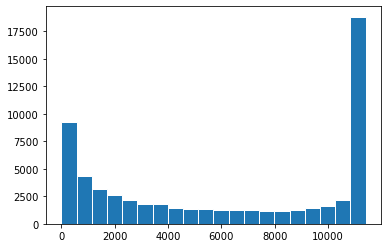

In [41]:
import matplotlib.pyplot as plt
print(len(genes))
plt.hist(x = genes['counts'], bins = 20, edgecolor = 'white')

In [15]:
import pandas as pd
X = pd.read_csv('../processing/top10k_abs_dev.csv', index_col = 'gene_id')
X2 = (X > 0).astype(int)


7041 11384.2343 11406 156.31578936085407


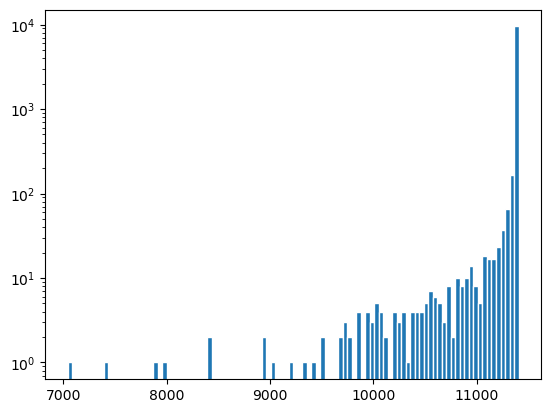

In [16]:
import matplotlib.pyplot as plt
import numpy as np
plt.yscale("log")
plt.hist(x = X2.sum(axis = 1), bins = 100, edgecolor = 'white')
l = X2.sum(axis = 1)
print(np.min(l), np.mean(l), np.max(l), np.std(l))

In [15]:
import pandas as pd
def get_clean_tsv(to_clean):
    for idx, row in to_clean.iterrows():
        with open('../query_1.2022-10-17/' + row['id'] + '/' + row['filename']) as raw:
            lines = raw.readlines()
            with open('../clean/' + row['filename'], 'w') as clean:
                [clean.write(x) for x in lines if (x[0] != '#' and x[0] != 'N')]

In [16]:
import pandas as pd
manifest4 =  pd.read_csv('../manifests/query_4.2022-11-03.txt', sep = '\t')
manifest1 = pd.read_csv('../manifests/query_1.2022-10-17.txt', sep = '\t')

to_clean = manifest1[~(manifest1['filename'].isin(manifest4['filename']))]
print(to_clean[0:5])
get_clean_tsv(to_clean)
                

                                     id  \
0  a0e68d0a-51ff-4b2b-a9b6-499f26651bc7   
1  dee27d65-9700-4d94-bd5d-8d67a34747a0   
5  ceaa16e9-5464-4977-bde4-c64258fbaed4   
6  d6f32fd3-e869-4ad5-8821-feb6f10bb941   
7  4a5cb3ce-9784-4d1f-8fae-50602d121aba   

                                            filename  \
0  c7522bbe-48b8-4338-b36e-564021353f00.rna_seq.a...   
1  8d272434-7ba5-4287-9f1f-f4fac4e1fc7b.rna_seq.a...   
5  4364a593-3f2b-446d-bdad-a2a2e899c6ca.rna_seq.a...   
6  92c25b70-7da5-41b2-b68d-2ba078b957e9.rna_seq.a...   
7  c42bc86c-11ae-4b1b-b281-dfdd2e2250a6.rna_seq.a...   

                                md5     size     state  
0  8bc65211e58780883a464ea17b1bd2ff  4205203  released  
1  acede3c0daf3c1837d7eb8602f514417  4237827  released  
5  c417fc225ea787b7b9606aee76ded3f4  4210784  released  
6  e958718c855c285ed941dccfad75ff50  4226323  released  
7  e57aa56bc3bbd01efa87f13c3f707c6a  4230270  released  
